# Adding water vapor feedback to the grey model of the atmosphere

#### Acknowledgments: This notebook borrows material from lecture notes of Geoff Vallis (university of Exeter) and Simona Bordoni (University of Trento)

You will recall from atmospheric physics that in the $n$ layer *black* body atmosphere we showed that the relationship between the surface temperature and the effective emitting temperature was 

$$
T^4_s=(n+1)T^4_e
$$

Thus as $n\rightarrow \infty$ then $T_s \rightarrow \infty$.  For a grey body atmosphere, instead, there is a finite solution and it turns out (I will add the full derivation to the atmos physics notes) that we can approximate this term in the energy balance equation by writing OLR term for the multilevel grey body model as :
  
$$
  C \frac{dT_s}{dt} = \frac{S_0}{4} [ 1 - \alpha(T_s)]  -  \frac{1}{1+\tau/2}\sigma T_s^4
$$
When $\tau=0$ this reduces to the simple energy balance model with a transparent atmosphere, $T_s$ then increases with $\tau$ as expected from an increasing greenhouse effect, and then as $\tau \rightarrow \infty$ the equations blows up and there is no solution for $T_s$!

We will specify the optical depth as a temperature-dependent function that represents the increase of water vapor specific humidity with temperature added to a constant value that represents the effects of clouds and other greenhouse gases:
 
 \begin{equation}
  \tau = \tau_{co2}+\tau_{wv}=1.12 + 0.14 \exp \big [ - \frac{L_v}{R_v}  \big( \frac{1}{T} - \frac{1}{288} \big ) \big ] 
  \end{equation}

 $\tau(T)$ includes a part that is constant (greenhouse gases and clouds) and a variable part that is proportional to water vapor pressure.  Remember that $R_v = 461.5$ J kg$^{-1}$ K$^{-1}$ and $L_v = 2.5 \times 10^6$ J kg$^{-1}$.

In [1]:
# packages needed in the notebook
import matplotlib.pyplot as plt
import numpy as np

# define constants
Lv=2.5e6
Rv=461.5
sigma=5.67e-8

In [2]:
def tauwv(T,fac=0.14):
    """optical depth as function of surface temperature DUE to WATER VAPOR"""
    return 0.41*np.exp(-Lv*(1/T-1/288)/Rv)

def tau(T,fac=0.14):
    return 1.12+tauwv(T,fac=fac)

# vector of surface temperatures
Ts=np.arange(200,400,5)

print(tau(288))

1.53


Now let's make a plot of Tau as a function of the surface temperature

Text(0, 0.5, 'Optical Depth ($\\tau$)')

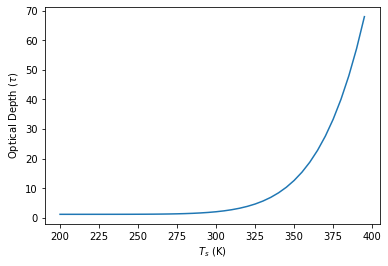

In [3]:

# plot Tau
fig,ax=plt.subplots()

ax.plot(Ts,tau(Ts))
ax.set_xlabel("$T_s$ (K)")
ax.set_ylabel("Optical Depth ($\\tau$)")


What do you notice about the shape of the curve?  

The optical depth is a highly non linear function and increasing rapidly with surface temperature, why is this?

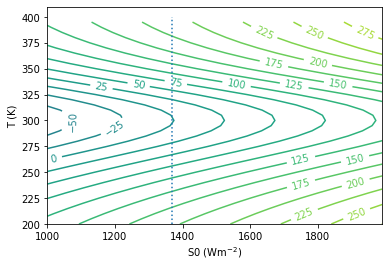

In [4]:
# surface albedo with ice feedback
def alfa(T,lconst=True):
    if lconst: 
        albedo=0.33    
    else:
        albedo=0.45-0.25*np.tanh((T-272)/23)
    return albedo 

def cdTdt(S,T):
    """define the energy balance equation in a function"""
    vtau=tau(T)
    return S*(1-alfa(T))/4 - (1/(1+tau(T)/2))*sigma*np.power(T,4)


# define the solar constant array
S0=np.arange(1000,2000,10)
Ts=np.arange(200,400,5)

T2d=np.tile(Ts,(len(S0),1)).transpose()
S2d=np.tile(S0,(len(Ts),1))


# contour plot
fig,ax=plt.subplots()
X=ax.contour(S2d,T2d,cdTdt(S2d,T2d),levels=np.arange(-400,400,25))
ax.clabel(X,fontsize=10)
ax.set_xlabel("S0 (Wm$^{-2}$)")
ax.set_ylabel("T (K)")

S0today=1370.
ax.vlines(S0today,200,400,linestyles="dotted")

## Exercises and Questions to consider: 

1. Take today's climate $S_0$, what is the equilibrium temperature?

2. Let's perturb $S_0$ to 1400 W m $^{-2}$, what happens to the temperature?

3. At what value of the solar constant does the system become unstable?

4. What is the physics of this instability?

Congratulations, you have discovered what is known as the runaway greenhouse effect, first coined by Ingersoll (82). We will discuss the physics of this in class. 

## Exercises on the climate feedback

1. Without looking at the next section, attempt to derive the water vapor climate feedback factor $\lambda_{wv}$ in this model for present day $S_0$.  
2. Is the feedback positive or negative, and do you understand why?
3. The feedback seems to be weaker than the value derived from GCMs.  What what you need to change the factor 0.14 to in order to get a feedback of 2.0 W m$^{-2}$ K$^{-1}$?  How would that revised value change the equilibrium climate for today's solar forcing?


## Feedback factor 

We recall that the climate feedback factor is the partial derivative of the TOA fluxes with respect to the surface temperature, changing only the parameter in question, in this case water vapour.

$$
\frac{\partial N}{\partial \tau} \frac{\partial \tau}{\partial T_s} = \frac{2\sigma T_s^4}{(2+\tau)^2} \frac{\partial \tau}{\partial T_s}
$$

$$
\frac{d\tau}{dT_s}=0.14 \exp \big [ - \frac{L_v}{R_v}  \big( \frac{1}{T_s} - \frac{1}{288} \big ) \big ] \frac{L_v} {R_v T_s^2}=\tau_{wv}(T)\frac{L_v} {R_v T_s^2}
$$

Note, you can also derive the total substantive derivative of $N$ and then subtract the Planck feedback, you should arrive at the same answer (try it and see!).


In [5]:
def dtaudT(T):
    """optical depth as function of surface temperature"""
    LoR=Lv/Rv
    return tauwv(T)*LoR/(T*T)

Ts=288
fac=2+tau(Ts)
lam=-2*sigma*np.power(Ts,3)*(4*fac-Ts*dtaudT(Ts))/(fac*fac)
lamwv=2*sigma*np.power(Ts,4)*dtaudT(Ts)/np.power(2+tau(Ts),2)

print ("total feedback ",lam," W m^-2 K^-1")
print ("water vapour feedback = ", lam+3.3," W m^-2 K^-1",lamwv)


total feedback  -1.3930684420019928  W m^-2 K^-1
water vapour feedback =  1.906931557998007  W m^-2 K^-1 1.676489274485259
